### Import libraries

In [13]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

x1 = []
y1 = []

### Parse input file to Pandas DataFrame

In [2]:
# filename = name of input file
# sep1 = separator for word
# sep2 = separator for lemmas
def parseFile(filename, sep1, sep2):
    file = pd.DataFrame(line.strip().split(sep1) for line in open(filename, 'r'))
    file.columns = ['word', 'lemmas']

    parsed = pd.DataFrame(file.lemmas.str.split(sep2).tolist(), file['word']).add_prefix('lemma_')
    parsed.index.rename('word', inplace=True)
    parsed.reset_index(inplace=True)

    parsed['word'] = parsed['word'].str.strip()
    
    return parsed

### Calculate the axes values (x = length of word / y = count of related lemmas)

In [3]:
def calculateAxes(df):
    x = []
    y = []
    
    for row in df.values:
        linha = [''.join(row[:1]), [x for x in row[1:] if x is not None and x != '']]
        x.append(len(linha[0]))
        y.append(len(linha[1]))

    return x, y

### API

In [4]:
def api(filename, sep1, sep2):
    global x1, y1
    
    df = parseFile(filename, sep1, sep2)
    x, y = calculateAxes(df)
    x1 = x
    y1 = y
    
    output = pd.DataFrame()
    output['x'] = x
    output['y'] = y
    
    corr = output.corr()
    return corr

In [5]:
resultado = api('AntBNC_lemmas_ver_001.txt', '->', '\t')
print(resultado)

          x         y
x  1.000000 -0.287841
y -0.287841  1.000000


### Exploratory analysis

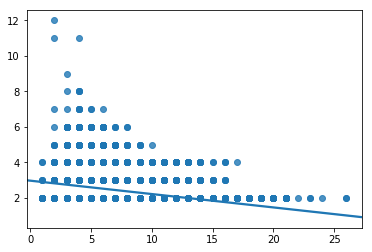

In [6]:
sb.regplot(x=np.array(x1), y=np.array(y1))

Text(0,0.5,'Quantidade de lemas relacionados')

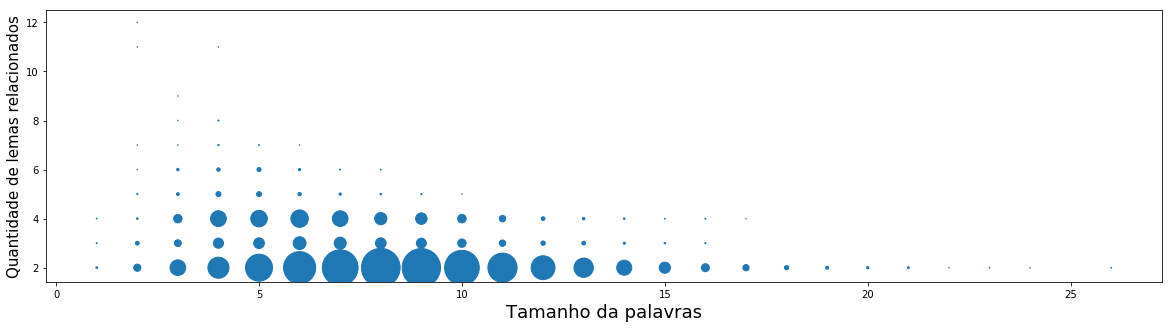

In [7]:
bubble = pd.DataFrame()
bubble['x'] = x1
bubble['y'] = y1
bubble['c'] = 1
bubble = bubble.groupby(['x', 'y'])['c'].sum().reset_index()

fig = plt.figure(figsize=(20,5))
plt.scatter(bubble['x'], bubble['y'], s=bubble['c']/3)
plt.xlabel("Tamanho da palavras", fontsize=18)
plt.ylabel("Quantidade de lemas relacionados", fontsize=15)

### Machine Learning Model with Logistic Regression

In [8]:
x1 = np.asarray(x1)
x1 = x1.reshape(-1, 1)

y1 = np.asarray(y1)
y1 = y1.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=1)

In [9]:
log = linear_model.LogisticRegression()

In [10]:
log.fit(x_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = log.predict(x_test)

In [12]:
print("Score Regressão Logística: " + str(log.score(x_test, y_test)))

Score Regressão Logística: 0.788970683198
